# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [3]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Numpy version: 1.26.4
Pandas version: 2.2.2
Matplotlib version: 3.10.0


1. Импортируйте модель данных "Ирисы Фишера".

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. Выполните нормализацию данных

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

In [10]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 1.5, min_samples = 8).fit(iris_df_scaled)

df_1=iris_df_scaled['petal length (cm)']
df_2=iris_df_scaled['sepal width (cm)']
df_test_2=db_default.fit_predict(iris_df_scaled)
df_test_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

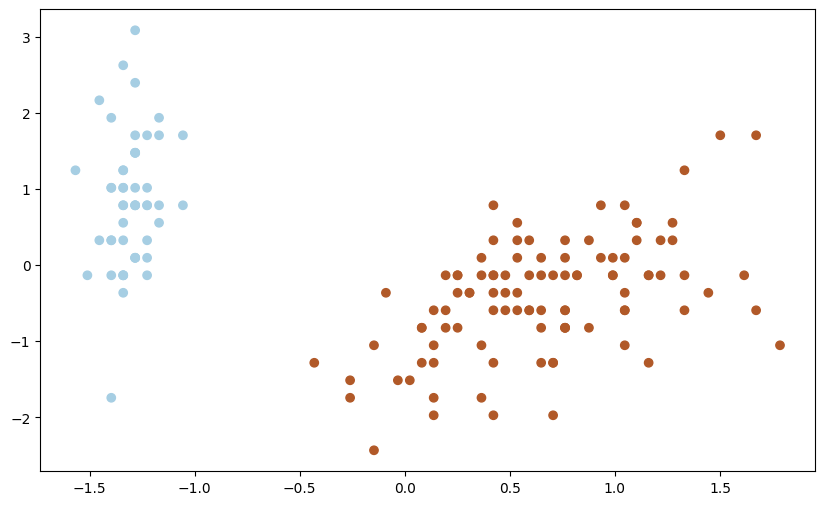

In [11]:
plt.figure(figsize = (10,6))
plt.scatter(df_1, df_2, c = df_test_2, cmap = 'Paired')

5. Сделайте вывод

Вывод: проведена процедура кластеризации для ряда ирисов.

## Вопросы

### Ответы на вопросы:

---

#### 1. В чем состоит задача кластеризации?
Кластеризация — это задача группировки объектов в группы (кластеры) таким образом, чтобы:
- Объекты внутри одного кластера были **максимально похожи**.
- Объекты из разных кластеров были **максимально различны**.

Пример: Группировка пассажиров Titanic на основе возраста и стоимости билета.

---

#### 2. Для каких целей используется кластеризация?
1. **Анализ данных**:
   - Выявление скрытых закономерностей (например, сегментация клиентов).
2. **Снижение размерности**:
   - Упрощение структуры данных.
3. **Рекомендательные системы**:
   - Группировка пользователей по интересам.
4. **Выявление аномалий**:
   - Идентификация выбросов и редких событий.
5. **Подготовка данных**:
   - Упрощение структуры данных перед классификацией.

---

#### 3. Алгоритм кластеризации Ллойда (K-средних)
Алгоритм K-средних (k-means) — это итеративный алгоритм, основанный на кластеризации Ллойда:
1. **Шаг 1 (Инициализация)**:
   - Выбрать \(k\) начальных центроидов случайным образом.
2. **Шаг 2 (Присвоение точек)**:
   - Каждая точка данных присваивается ближайшему центроиду.
3. **Шаг 3 (Обновление центроидов)**:
   - Вычислить новые центроиды как среднее всех точек, принадлежащих кластеру.
4. **Повторение**:
   - Повторять шаги 2 и 3 до тех пор, пока центроиды не перестанут изменяться (или не достигнут лимита итераций).

---

#### 4. Как выбрать количество кластеров для алгоритма K-средних?
Выбор количества кластеров \(k\) — важный шаг в K-средних:
1. **Метод локтя (Elbow Method)**:
   - Построить график зависимости суммы внутрикластерных расстояний от \(k\).
   - Точка излома на графике указывает оптимальное количество кластеров.

2. **Силуэтный коэффициент (Silhouette Score)**:
   - Оценка качества кластеров, значения находятся в диапазоне от -1 до 1.
   - Более высокое значение указывает на лучшее разбиение.

3. **Интуиция и знание данных**:
   - Использовать понимание структуры данных для выбора \(k\).

---

#### 5. Алгоритм DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности:
1. **Основные параметры**:
   - \(eps\) (радиус): Максимальное расстояние между точками для включения в один кластер.
   - \(minPts\): Минимальное количество точек в радиусе \(eps\), чтобы точка считалась "основной".
2. **Типы точек**:
   - **Основные точки**: Имеют не менее \(minPts\) соседей в радиусе \(eps\).
   - **Граничные точки**: Находятся в радиусе \(eps\) от основной точки, но имеют меньше \(minPts\) соседей.
   - **Шум**: Точки, которые не попадают ни в один кластер.
3. **Алгоритм**:
   - Для каждой точки проверяется, является ли она основной.
   - Основные точки объединяются в кластеры.
   - Граничные точки добавляются к ближайшему кластеру.
   - Шум остается вне кластеров.
4. **Особенности**:
   - Подходит для кластеров любой формы.
   - Устойчив к выбросам.

---